In [42]:
DEBUG = True

In [62]:
import csv

genome_tags_count = 1129
genome_tags = [0] * (genome_tags_count + 1)

with open('genome-tags.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(row)
            line_count += 1
        else:
            tagId = int(row[0])
            genome_tags[tagId] = row[1]
            line_count += 1
    print(f'Processed {line_count} lines.')

if DEBUG:
    print(genome_tags[2], "\n" + genome_tags[3])

['tagId', 'tag']
Processed 1129 lines.
007 (series) 
18th century


In [63]:
Genres = ['Action', 'Adventure', 'Animation', 'Children\'s', 
          'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
          'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
          'Sci-Fi', 'Thriller', 'War', 'Western', '(no genres listed)']

In [66]:
movies_count = 209171
movies = [0] * (movies_count + 1)
biggest = 0

with open('movies.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(row)
            line_count += 1
        else:
            biggest = max(biggest, int(row[0]))
            movieId = int(row[0])
            movies[movieId] = [0] * 2
            movies[movieId][0] = row[1]
            movies[movieId][1] = []
            genres = row[2].split('|')
            for g in genres:
                movies[movieId][1].append(g)
            line_count += 1
    print(f'Processed {line_count} lines.')

if DEBUG:
    print(movies[movies_count], "\n", movies[3])
    print(biggest)

['movieId', 'title', 'genres']
Processed 62424 lines.
["Women of Devil's Island (1962)", ['Action', 'Adventure', 'Drama']] 
 ['Grumpier Old Men (1995)', ['Comedy', 'Romance']]
209171


In [70]:
genome_scores = [0] * movies_count
biggest = 0
    
with open('genome-scores.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            movieId = int(row[0])
            biggest = max(movieId, biggest)
            if genome_scores[movieId] == 0:
                genome_scores[movieId] = [0] * genome_tags_count
            tagId = int(row[1])
            genome_scores[movieId][tagId] = float(row[2])
            line_count += 1
    print(f'Processed {line_count} lines.')

if DEBUG:
    print(genome_scores[1][2], "\n", genome_scores[biggest][343])

Processed 15584449 lines.
0.023749999999999993 
 0.05125000000000002


In [87]:
users_count = 189169
smallest = users_count + 1
biggest = 0
ratings = {}
    
with open('ratings.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count % 1000000 == 0 and DEBUG:
            print(line_count)
        if line_count == 0:
            line_count += 1
        else:
            userId = int(row[0])
            smallest = min(smallest, userId)
            biggest = max(biggest, userId)
            movieId = int(row[1])
            rating = float(row[2])
            timestamp = int(row[3])
            if userId not in ratings:
                ratings[userId] = {}
            ratings[userId][movieId] = (rating, timestamp)
            line_count += 1
    print(f'Processed {line_count} lines.')

if DEBUG:
    print(smallest, ratings[smallest], "\n", biggest, ratings[biggest]) 

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
Processed 25000096 lines.
1 {296: (5.0, 1147880044), 306: (3.5, 1147868817), 307: (5.0, 1147868828), 665: (5.0, 1147878820), 899: (3.5, 1147868510), 1088: (4.0, 1147868495), 1175: (3.5, 1147868826), 1217: (3.5, 1147878326), 1237: (5.0, 1147868839), 1250: (4.0, 1147868414), 1260: (3.5, 1147877857), 1653: (4.0, 1147868097), 2011: (2.5, 1147868079), 2012: (2.5, 1147868068), 2068: (2.5, 1147869044), 2161: (3.5, 1147868609), 2351: (4.5, 1147877957), 2573: (4.0, 1147878923), 2632: (5.0, 1147878248), 2692: (5.0, 1147869100), 2843: (4.5, 1147868891), 3448: (4.0, 1147868480), 3569: (5.0, 1147879603), 3949: (5.0, 1147868678), 4144: (5.0, 1147868898), 4308: (3.0, 1147868534), 4325: (5.0, 1147878122), 4422: (3.0, 1147869048), 4703: (4.0, 1147869223), 4973: (4.5, 1147869080), 5147: (4

In [88]:
tags = {}
smallest = users_count + 1
biggest = 0
    
with open('tags.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            userId = int(row[0])
            smallest = min(smallest, userId)
            biggest = max(biggest, userId)
            movieId = int(row[1])
            tag = row[2]
            timestamp = int(row[3])
            if userId not in tags:
                tags[userId] = {}
            tags[userId][movieId] = (tag, timestamp)
            line_count += 1
    print(f'Processed {line_count} lines.')

if DEBUG:
    print(tags[smallest], "\n", tags[biggest]) 

Processed 1093361 lines.
{260: ('sci-fi', 1439472256)} 
 {189169: ('robbery', 1527518193)}


In [92]:
len(tags)

14592

In [131]:
import statistics as stat
userStats = {}
how_many_zeros = 0

for i in range(users_count + 1):
#   Comment: if i not in ratings => then #ratings = #tags = 0 for user i
    if i not in ratings:
        continue
    ratingsSize = len(ratings[i])
    tagsSize = (len(tags[i]) if i in tags else 0)
    avgGrade = stat.mean([x for (x, _) in ratings[i].values()])
    userStats[i] = (ratingsSize, tagsSize, avgGrade)
    
# print(len(userStats))
# print(userStats)
# print(how_many_zeros)

In [135]:
f = open("userStats.txt", "w+")
for (k, (x, y, z)) in userStats.items():
    f.write(str(k) + "," + str(x) + "," +  str(y) +  "," +  str(z) + "\n")
#     print(k, ",", x, ",", y, ",", z, "\n") 
f.close()

*****************************************************************
#  The Social Web 
- Instructors Davide Ceolin, Dayana Spagnuelo
- Exercises for Hands-on session 1
- 6 February 2020 11:00 - 12:45                 
- NU-5B-21, NU-6A-04, NU-6B-20, NU-6C-39, NU-6C-40                             
*****************************************************************

Prerequisites:
- Python 3.7
- Python packages: twitter, prettytable, matplotlib

First you need to know how to retrieve some social web data. Exercises 1 and 2 will show you how to retrieve trends and search results from Twitter. 

But let's check first if we're running a sufficiently new version of Python:

In [1]:
import platform
import sys
print("This jupyter notebook is running on Python " + platform.python_version())
# It's good practice to assert packages requirements at the beginning of a script:
assert sys.version_info >= (3, 6) # Tested with Python==3.7.5

This jupyter notebook is running on Python 3.7.4


Let's install now the required packages for this hands on session:

In [2]:
# If you're using a virtualenv, make sure its activated before running 
# this cell!
!pip install twitter PrettyTable matplotlib

    100% |████████████████████████████████| 61kB 5.8MB/s ta 0:00:01
  Running setup.py install for PrettyTable ... done
You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Part 1: Authorizing an application to access Twitter account data (from Example 1-1/9-1 in Mining the Social Web):

1. Make sure to add your mobile phone number to your private twitter profile.
2. Go to https://apps.twitter.com/ and click on "create an app". Twitter will prompt you to create a *developer account*.
3. You'll receive an *account confirmation* email with a link. Follow it and create an app. 
4. Once the app is created, you'll see a "Keys and Token" item on the top left-hand side corner of the webpage. This values will be needed to fill in the next cell.

In [3]:
import twitter # Tell Python to use the twitter package
CONSUMER_KEY = 'W85U1ou4uhCwajj6FQATY0gLv'
CONSUMER_SECRET = 'xcNoU3jY8XKFVzg6pcQCySsOAvP9HEADZfeW670XvsanV5n6fq'
# to get the oauth credential you need to click on the 'Generate access token' button:
OAUTH_TOKEN = '937841513580646401-TaeSO8Lt7L5R9zUArxg3vQoOQPTU23H' 
OAUTH_TOKEN_SECRET = '7siMLf4qxtpcKVzpEzzjpyrjdMQHPXfDUwySP1DHYkxtJ'
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)
print(twitter_api) 
# Nothing to see by displaying twitter_api except that it's now a defined variable


### 1.1: Retrieving twitter search trends (from Example 1-2/9-2 in Mining the Social Web)

In [8]:
WORLD_WOE_ID = 1 # The "Yahoo! Where On Earth ID" for the entire world
world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID) # get back a callable
print(world_trends)

[{'trends': [{'name': '#DIVEwithiKON', 'url': 'http://twitter.com/search?q=%23DIVEwithiKON', 'promoted_content': None, 'query': '%23DIVEwithiKON', 'tweet_volume': 126052}, {'name': '非公開リスト', 'url': 'http://twitter.com/search?q=%E9%9D%9E%E5%85%AC%E9%96%8B%E3%83%AA%E3%82%B9%E3%83%88', 'promoted_content': None, 'query': '%E9%9D%9E%E5%85%AC%E9%96%8B%E3%83%AA%E3%82%B9%E3%83%88', 'tweet_volume': 39153}, {'name': '#Kıyamet', 'url': 'http://twitter.com/search?q=%23K%C4%B1yamet', 'promoted_content': None, 'query': '%23K%C4%B1yamet', 'tweet_volume': 12172}, {'name': '#ミラティブでガチャ代ゲット', 'url': 'http://twitter.com/search?q=%23%E3%83%9F%E3%83%A9%E3%83%86%E3%82%A3%E3%83%96%E3%81%A7%E3%82%AC%E3%83%81%E3%83%A3%E4%BB%A3%E3%82%B2%E3%83%83%E3%83%88', 'promoted_content': None, 'query': '%23%E3%83%9F%E3%83%A9%E3%83%86%E3%82%A3%E3%83%96%E3%81%A7%E3%82%AC%E3%83%81%E3%83%A3%E4%BB%A3%E3%82%B2%E3%83%83%E3%83%88', 'tweet_volume': 11079}, {'name': '#VS嵐', 'url': 'http://twitter.com/search?q=%23VS%E5%B5%90', 'promot

### Task 1
Find out how WORLD_WOE_IDs are defined by Yahoo and try to use others in a query. What kind of differences do you find between the worldwide trends and the local trends? 


In [10]:
AMSTERDAM_WOE_ID = 727232 # WOEID for Amsterdam
# amsterdam_trends = twitter_api.trends.place(_id=AMSTERDAM_WOE_ID) # get back a callable
# print(amsterdam_trends)
WARSAW_WOE_ID = 523920
warsaw_trends = twitter_api.trends.place(_id=WARSAW_WOE_ID)
print(warsaw_trends)

[{'trends': [{'name': '#DIVEwithiKON', 'url': 'http://twitter.com/search?q=%23DIVEwithiKON', 'promoted_content': None, 'query': '%23DIVEwithiKON', 'tweet_volume': 122557}, {'name': 'Kirk Douglas', 'url': 'http://twitter.com/search?q=%22Kirk+Douglas%22', 'promoted_content': None, 'query': '%22Kirk+Douglas%22', 'tweet_volume': 249381}, {'name': 'Hołownia', 'url': 'http://twitter.com/search?q=Ho%C5%82ownia', 'promoted_content': None, 'query': 'Ho%C5%82ownia', 'tweet_volume': 11348}, {'name': 'kołobrzegu', 'url': 'http://twitter.com/search?q=ko%C5%82obrzegu', 'promoted_content': None, 'query': 'ko%C5%82obrzegu', 'tweet_volume': None}, {'name': '#i_DECIDE', 'url': 'http://twitter.com/search?q=%23i_DECIDE', 'promoted_content': None, 'query': '%23i_DECIDE', 'tweet_volume': 232767}, {'name': 'Spot', 'url': 'http://twitter.com/search?q=Spot', 'promoted_content': None, 'query': 'Spot', 'tweet_volume': 194355}, {'name': 'Zagłębie', 'url': 'http://twitter.com/search?q=Zag%C5%82%C4%99bie', 'promote

### 1.2: Retrieving search results (from Example 1-5/9-3 in Mining the Social Web):

In [33]:
q = '#ThrowbackThursday' # XXX: Set this variable to a trending topic, or anything else you like. 
count = 100 # number of results to retrieve

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets for more info

search_results = twitter_api.search.tweets(q=q, count=count) # search for your query 'q' 100 times
statuses = search_results['statuses'] # extract the tweets found

# The following code allows you to print in a nice format the contents of search_results
import json
print(type(statuses))
print(json.dumps(statuses[0], indent=1))

<class 'list'>
{
 "created_at": "Thu Feb 06 11:16:06 +0000 2020",
 "id": 1225377623808847872,
 "id_str": "1225377623808847872",
 "text": "RT @ChampionsLeague: \ud83c\udde7\ud83c\uddf7 Ronaldinho ballin' out against AC Milan in 2006 \ud83d\ude0e\n\n#UCL | #ThrowbackThursday https://t.co/UamHlVSmQV",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "UCL",
    "indices": [
     75,
     79
    ]
   },
   {
    "text": "ThrowbackThursday",
    "indices": [
     82,
     100
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "ChampionsLeague",
    "name": "UEFA Champions League",
    "id": 627673190,
    "id_str": "627673190",
    "indices": [
     3,
     19
    ]
   }
  ],
  "urls": [],
  "media": [
   {
    "id": 1156867268992733184,
    "id_str": "1156867268992733184",
    "indices": [
     101,
     124
    ],
    "media_url": "http://pbs.twimg.com/media/EA4FXDsWwAAkpdF.jpg",
    "media_url_https": "https://pbs.twimg.com/media/EA4FXDsWwAAk

### Task 2

In the cell below, create a second variable (e.g. `statuses2`) that holds the results of a query other than the one presented above. Think about a query that would yield very different results than the first one, for example one that may yield a shorter output or about a different topic.

In [48]:
q2 = '#SzymonHołownia'
count2 = 100

search_results2 = twitter_api.search.tweets(q=q2, count=count2)
statuses2 = search_results2['statuses']

print(json.dumps(statuses2[0], indent=1))

{
 "created_at": "Thu Feb 06 09:39:17 +0000 2020",
 "id": 1225353257234632706,
 "id_str": "1225353257234632706",
 "text": "@KosiniakKamysz @szymon_holownia \u015awietny spot #szymonholownia. Prosz\u0119 odnie\u015b\u0107 si\u0119 do jego meritum i nie do\u0142\u0105cza\u0107 do\u2026 https://t.co/ZdekVBrAJy",
 "truncated": true,
 "entities": {
  "hashtags": [
   {
    "text": "szymonholownia",
    "indices": [
     46,
     61
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "KosiniakKamysz",
    "name": "W.Kosiniak-Kamysz",
    "id": 955239446,
    "id_str": "955239446",
    "indices": [
     0,
     15
    ]
   },
   {
    "screen_name": "szymon_holownia",
    "name": "Szymon Ho\u0142ownia Oficjalny",
    "id": 1193947151971311618,
    "id_str": "1193947151971311618",
    "indices": [
     16,
     32
    ]
   }
  ],
  "urls": [
   {
    "url": "https://t.co/ZdekVBrAJy",
    "expanded_url": "https://twitter.com/i/web/status/1225353257234632706",
    "disp

## Part 2: Extracting text, screen names, and hashtags from tweets (from Example 1-6 in Mining the Social Web)

Simply printing all the search results to screen is nice, but to really start analysing them, it is handy to select the interesting parts and store them in a different structure such as a list. 

In this example you are using a thing called "List Comprehension".

### 2.1 List Comprehensions
List comprehension is a powerful construct that allows to succinctly build a list.
With it you can process items from any iterable (e.g. dictionaries, lists, tuples, iterators...) and output a list while optionally performing an operation on each value.

Here's a few examples:

In [49]:
# double all values from 0 to 9
double_list = [i*2 for i in range(10)]
# raise to the power of 2, but only if the number is uneven
power_even_list = [i**2 for i in range(10) if i%2!=0]
# clean strings in a tuple
stripped_lines = [x.strip() for x in ('The\n', 'Social\n', 'Web\n')]
# return length of each string in stripped_lines
len_str_lines = [len(s) for s in stripped_lines]
# finally, we can nest list comprehensions to flatten a list of lists:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
range_9 = [x for y in list_of_lists for x in y]

print(double_list)
print(power_even_list)
print(stripped_lines)
print(len_str_lines)
print(range_9)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[1, 9, 25, 49, 81]
['The', 'Social', 'Web']
[3, 6, 3]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


### 2.2 Parsing text, screen names and hashtags from tweets
*(from Example 1-6 in Mining the Social Web)*

Hereafter, we'll be creating a variable `status_texts` of type list. \
The list will be filled with the `text` elements from each `status`, whereas `status` comes from looping through all `statuses` in the `search_results` list (1.2). \
Look up the list comprehensions in your Python reference materials to make sure you understand what's happening here. 

In [68]:
status_texts = [ status['text'] for status in statuses ]
# the escape character "\" allows for the list comprehension to continue
# on a new line. While not strictly necessary, it makes code more readable
# for your fellow programmers.
screen_names = [ user_mention['screen_name'] for status in statuses \
                for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] for status in statuses \
        for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w for t in status_texts for w in t.split() ] #split the string on the empty spaces

# Explore the first 5 items for each...
print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1))
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @ChampionsLeague: \ud83c\udde7\ud83c\uddf7 Ronaldinho ballin' out against AC Milan in 2006 \ud83d\ude0e\n\n#UCL | #ThrowbackThursday https://t.co/UamHlVSmQV",
 "RT @TorosenDonosti: \ud83d\udc40\ud83d\udd19  Hoy nos vamos 20 a\u00f1os atr\u00e1s para recordar la faena de Jos\u00e9 Tom\u00e1s  en la Semana Grande Donostiarra \ud83d\ude0d\n\n #tbt #throwba\u2026",
 "RT @ChampionsLeague: \ud83c\udde7\ud83c\uddf7 Ronaldinho ballin' out against AC Milan in 2006 \ud83d\ude0e\n\n#UCL | #ThrowbackThursday https://t.co/UamHlVSmQV",
 "RT @ChampionsLeague: \ud83c\udde7\ud83c\uddf7 Ronaldinho ballin' out against AC Milan in 2006 \ud83d\ude0e\n\n#UCL | #ThrowbackThursday https://t.co/UamHlVSmQV",
 "RT @G2esports: Los sue\u00f1os se hacen realidad @IbaiLlanos \u2764\ufe0f \ud83c\uddea\ud83c\uddf8 #ThrowbackThursday https://t.co/UxSsXSZQ2i"
]
[
 "ChampionsLeague",
 "TorosenDonosti",
 "ChampionsLeague",
 "ChampionsLeague",
 "G2esports"
]
[
 "UCL",
 "ThrowbackThursday",
 "tbt",
 "UCL",
 "Throwbac

### Task 3

You are now ready to parse usernames, hashtags and text from the results you previously obtained in Task 2 (e.g. `statuses_2`). While doing it, make sure to leave the variables created in 2.2 untouched. Instead, create your own variable names, which you'll be using soon.


In [69]:
status_texts2 = [status['text'] for status in statuses2]

screen_names2 = [user_mention['screen_name'] for status in statuses2 \
                 for user_mention in status['entities']['user_mentions']]

hashtags2 = [hashtag['text'] for status in statuses2 \
             for hashtag in status['entities']['hashtags']]

words2 = [w for t in status_texts2 for w in t.split()]

print(json.dumps(status_texts2[0:5], indent=1))
print(json.dumps(screen_names2[0:5], indent=1))
print(json.dumps(hashtags2[0:5], indent=1))
print(json.dumps(words2[0:5], indent=1))

[
 "@KosiniakKamysz @szymon_holownia \u015awietny spot #szymonholownia. Prosz\u0119 odnie\u015b\u0107 si\u0119 do jego meritum i nie do\u0142\u0105cza\u0107 do\u2026 https://t.co/ZdekVBrAJy",
 "RT @bwalejko: Ludzie pytaj\u0105: Czy @szymon_holownia da sobie rad\u0119 z polityk\u0105, \u017ce to trudne. Ja Wam m\u00f3wi\u0119: To polityka b\u0119dzie musia\u0142a da\u0107 sobi\u2026",
 "RT @bwalejko: Ludzie pytaj\u0105: Czy @szymon_holownia da sobie rad\u0119 z polityk\u0105, \u017ce to trudne. Ja Wam m\u00f3wi\u0119: To polityka b\u0119dzie musia\u0142a da\u0107 sobi\u2026",
 "RT @bwalejko: Ludzie pytaj\u0105: Czy @szymon_holownia da sobie rad\u0119 z polityk\u0105, \u017ce to trudne. Ja Wam m\u00f3wi\u0119: To polityka b\u0119dzie musia\u0142a da\u0107 sobi\u2026",
 "Ludzie pytaj\u0105: Czy @szymon_holownia da sobie rad\u0119 z polityk\u0105, \u017ce to trudne. Ja Wam m\u00f3wi\u0119: To polityka b\u0119dzie musia\u0142\u2026 https://t.co/gE9WjWBcYn"
]
[
 "KosiniakKamysz",
 "szymon_ho

## Part 3: Creating a basic frequency distribution from words in tweets
*(from Examples 1-7 in Mining the Social Web)* 


In the cell below we display the 10 most common hashtag instances:

In [70]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    
print(c.most_common()[:10]) # top 10

[('ThrowbackThursday', 76), ('UCL', 49), ('tbt', 3), ('AfternoonDriveShow', 2), ('NowPlaying', 2), ('throwbackthursday', 2), ('KratosRugby', 1), ('GoodForThat', 1), ('GoodForThatchallenge', 1), ('SKODA', 1)]


Your output should look something like this: \
`[('ThrowbackThursday', 34), ('throwbackthursday', 11), ('TBT', 6), ('ThrowBackThursday', 6), ('Trivia', 3), ('madoka_magica', 2), ('New', 2), ('EURO2020', 2), ('artists', 2)]`

### Task 4
Show hashtags frequency for results that you obtained in Task 3. Think about possible explanations for the different results you get from the analyses for the different queries.


In [71]:
for item in [words2, screen_names2, hashtags2]:
    c2 = Counter(item)

print(c2.most_common()[:10])

[('szymonholownia', 1)]


### 3.1 Storing your results
So far, we have been storing the data in working memory. Often it's handy to store your data to disk so you can retrieve it in a next session. 

The pickle module lets you do exactly that, by serializing data in a binary format.


In [72]:
import pickle

filepath = "my_data.pickle"
# this indented python syntax is broadly defined as "context manager".
# This means that everything happening under its indentation will use f
# as file handle to filepath. The Shortand `wb` stands for "write binary",
# which is how we serialize data to disk.
with open(filepath, "wb") as f:
    pickle.dump(words, f) # write the contents of list 'words' to file 'f'
    
# Note that, after the end of the indented block, the file is automatically closed.
# Hence, no memory resource on your system is wasted idly.

If you browse to your working directory, you should find a file there named "myData.pickle". You can open this in a text editor, or load its contents back into a variable to do some more analyses on.


In [73]:
# open the myData.pickle file and store its contents into variable 'words'

with open(filepath, "rb") as f:
    words = pickle.load(f)
print(words)

['RT', '@ChampionsLeague:', '🇧🇷', 'Ronaldinho', "ballin'", 'out', 'against', 'AC', 'Milan', 'in', '2006', '😎', '#UCL', '|', '#ThrowbackThursday', 'https://t.co/UamHlVSmQV', 'RT', '@TorosenDonosti:', '👀🔙', 'Hoy', 'nos', 'vamos', '20', 'años', 'atrás', 'para', 'recordar', 'la', 'faena', 'de', 'José', 'Tomás', 'en', 'la', 'Semana', 'Grande', 'Donostiarra', '😍', '#tbt', '#throwba…', 'RT', '@ChampionsLeague:', '🇧🇷', 'Ronaldinho', "ballin'", 'out', 'against', 'AC', 'Milan', 'in', '2006', '😎', '#UCL', '|', '#ThrowbackThursday', 'https://t.co/UamHlVSmQV', 'RT', '@ChampionsLeague:', '🇧🇷', 'Ronaldinho', "ballin'", 'out', 'against', 'AC', 'Milan', 'in', '2006', '😎', '#UCL', '|', '#ThrowbackThursday', 'https://t.co/UamHlVSmQV', 'RT', '@G2esports:', 'Los', 'sueños', 'se', 'hacen', 'realidad', '@IbaiLlanos', '❤️', '🇪🇸', '#ThrowbackThursday', 'https://t.co/UxSsXSZQ2i', 'RT', '@kratosrugby:', '#ThrowbackThursday', 'Henry', 'Musisi', 'and', 'Kyadondo', '-', 'a', 'love', 'story', 'that', 'always', 'give

### 3.2 Using prettytable to display tuples in a nice way



In [74]:
from prettytable import PrettyTable
for label, data in (('Word', words),
                    ('Screen Name', screen_names),
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt) 

+--------------------+-------+
| Word               | Count |
+--------------------+-------+
| RT                 |    79 |
| #ThrowbackThursday |    75 |
| in                 |    52 |
| |                  |    52 |
| 🇧🇷                 |    49 |
| AC                 |    49 |
| Milan              |    49 |
| 2006               |    49 |
| 😎                  |    49 |
| #UCL               |    49 |
+--------------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| ChampionsLeague |    47 |
| G2esports       |     5 |
| IbaiLlanos      |     5 |
| Journeyman_NG   |     3 |
| RCBTweets       |     3 |
| kratosrugby     |     2 |
| LigadeCampeones |     2 |
| 10Ronaldinho    |     2 |
| shyTALKactive   |     2 |
| _paschalito     |     2 |
+-----------------+-------+
+----------------------+-------+
| Hashtag              | Count |
+----------------------+-------+
| ThrowbackThursday    |    76 |
| UCL                  |    49 |
| tbt    

### 3.3 Calculating lexical diversity for tweets 
*(from Example 1-9 in Mining the Social Web)*:

In [75]:
# Define a function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens)

# Define a function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ])
    return 1.0*total_words/len(statuses) 

# Let's use these functions:

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.3515151515151515
0.4166666666666667
0.35353535353535354
16.5


### Task 5: What do the printed numbers indicate? Try to explain them.

(*Double click this cell to write your answer*)

They indicate that tweets are quite short (16.5 words on average). That would be equal to 2 sentences. Other indicator is that lexical_dviersity is pretty low, what means, that for this topic similar words are being used. 

### 3.4 Finding the most popular retweets 
*(from Example 1-10 in Mining the Social Web):*

In [92]:
retweet_cnt_un_txt = [(status['retweet_count'],
    status['retweeted_status']['user']['screen_name'],
    status['retweeted_status']['id'],
    status['text'])# Store out a tuple of these three values
    for status in statuses2 # for each status
    if 'retweeted_status' in status # ... so long as the status meets this condition.
    ]

# Slice off the first 5 from the sorted results and display each item in the tuple
pt = PrettyTable(field_names=['Count', 'Screen Name', 'ID', 'Text'])
[ pt.add_row(row) for row in sorted(retweet_cnt_un_txt, reverse=True)[:10] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+-------------+---------------------+----------------------------------------------------+
| Count | Screen Name | ID                  | Text                                               |
+-------+-------------+---------------------+----------------------------------------------------+
| 3     | bwalejko    | 1222996866473910272 | RT @bwalejko: Ludzie pytają: Czy @szymon_holownia  |
|       |             |                     | da sobie radę z polityką, że to trudne. Ja Wam     |
|       |             |                     | mówię: To polityka będzie musiała dać sobi…        |
| 3     | bwalejko    | 1222996866473910272 | RT @bwalejko: Ludzie pytają: Czy @szymon_holownia  |
|       |             |                     | da sobie radę z polityką, że to trudne. Ja Wam     |
|       |             |                     | mówię: To polityka będzie musiała dać sobi…        |
| 3     | bwalejko    | 1222996866473910272 | RT @bwalejko: Ludzie pytają: Czy @szymon_holownia  |
|       | 

### 3.5 Looking up users who have retweeted a status 
*(from Example 1-11 in Mining the Social Web):*

In [93]:
_retweets = twitter_api.statuses.retweets(id=1225345630488481794, count=100) # Get the original tweet id for a tweet from its retweeted_status node and insert it here
print("Users who've retweeted the tweet:\n")
print([r['user']['screen_name'] for r in _retweets])

Users who've retweeted the tweet:

['gustavitobtz', 'SbEKkITo', 'DJPooh8', 'CRonaldohayran1', 'porjuk_', '01a6225061954c5', 'parleycentro', 'ohs4', 'misterNigeria', 'Baksteen_exe', 'xfrentefriax', 'loco61583934', 'LourdesJadesola', 'bryte_carison', 'TitiHeny14', 'Yanis45976', 'RS_huma', 'Nivlek2018', '1yjeHuJJU6orh4O', 'JayR920', 'Balatic', 'MatiiSuarez5', 'Corujaa22', 'OmobaPaul', 'cmaltahona', 'Dwagg_', 'jhonhurtadog', 'PeacefulSteez', '_oluwagbohunmi', 'AVasquezzz90', 'misugi37', 'hezexidil10', 'ferudunyayla', 'SebaSisyphus', '89andre89', 'clement35833508', 'El_Muhy', 'DjBigMikeHD', 'ceku4cab', 'Sammybenefit1', 'mohamedalio2', 'zeniusboy', 'freddy0811791', 'Richmon05855014', 'neymar5258', 'SargentoCarlos', 'SpittingVenom96', 'kaamarss_kaamar', 'ahmtozdnz', 'Apollov47', 'Bawendi', 'GabrielSjj3', 'J_Paul_360', 'Maico11ch', 'abhijith_anish', 'yonnypraderas', 'Mdfonsecaa', 'kartalll190319', 'sercanka1903', 'jeremy_fillion', 'Mandydadon', 'macelevy20', 'Bhoy___David', 'jmarques_21', 'Ale

### Task 6 (advanced)

If you have a Twitter account with a nontrivial number of tweets, request your historical tweet archive from your account settings and analyze it. \
The export of your account data includes files organized by time period in a convenient JSON format. See the README.txt file included in the downloaded archive for more details. 



What are the most common terms that appear in your tweets? \
Who do you retweet the most often? \
How many of your tweets are retweeted (and why do you think this is the case)?

### 3.6 Plotting frequencies of words 
*(from Example 1-12 in Mining the Social Web)*


In the previous exercises we have been looking at the text from the tweets, but when you retrieved the results, you retrieved much more information about the tweets, such as the username of the person who shared this tweet with the world. 


You can use this information to find out who retweets whom in our examples. 

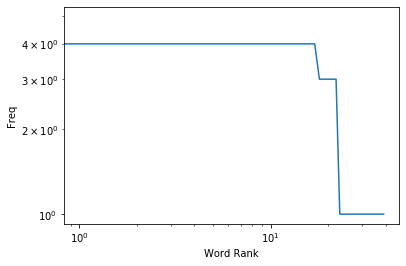

In [96]:
word_counts = sorted(Counter(words2).values(), reverse=True)
import matplotlib.pyplot as plt
plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.show()

### Generating histograms of words, screen names, and hashtags 
*(from Example 1-13 in Mining the Social Web):*

[3, 3, 3]


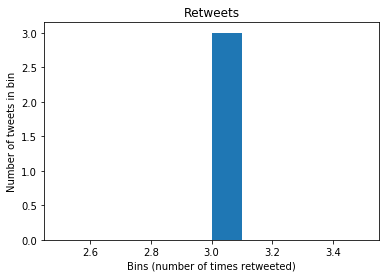

In [97]:
counts = [count for count, _, _, _ in retweet_cnt_un_txt]
plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')
print(counts)
plt.show()

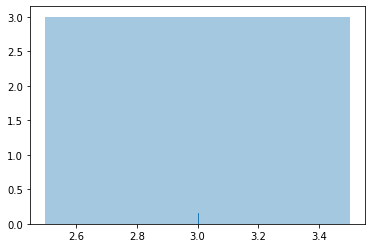

In [98]:
# extra: seaborn plots with a one-liner.
!pip install seaborn
import seaborn as sns

sns.distplot(counts, kde=False, rug=True);
